In [9]:
import pandas as pd
import seaborn as sns

In [3]:
raw_data = {
    "LRU": [
        [0.28171, 0.36874, 0.262841, 0.293447, 0.325124, 0.272456],
        [0.275579, 0.30572, 0.273791, 0.279003, 0.314242, 0.286744],
        [0.275572, 0.263423, 0.283012, 0.271025, 0.944937, 0.28326],
        [0.493662, 1.36281, 1.58489, 0.455622, 1.68356, 0.474939],
        [0.415115, 1.06555, 0.440796, 0.407074, 0.428242, 0.44811]
    ],
    "CFLRU": [
        [0.287094, 0.290443, 0.285219, 0.303059, 0.333291, 0.266269],
        [0.288069, 0.297067, 0.291356, 0.29504, 0.29758, 0.315849],
        [0.927584, 0.976015, 0.944146, 0.26992, 0.265757, 0.278178],
        [1.56978, 1.53937, 1.53116, 0.503947, 1.65934, 0.498925],
        [0.411775, 1.28503, 0.40969, 0.427626, 0.425763, 1.43597]
    ],
    "LRU-WSR": [
        [0.317221, 0.279914, 0.276451, 0.281423, 0.324301, 0.364748],
        [0.285101, 0.289854, 0.29664, 0.2792, 0.278329, 0.320304],
        [0.28108, 1.29242, 0.991301, 1.43693, 0.447472, 1.43452],
        [1.59057, 1.55234, 1.58517, 0.477171, 1.66597, 0.495076],
        [0.415186, 1.26919, 0.418681, 0.431878, 0.421693, 0.416233]
    ]
}

In [27]:
# k=row, c=col
df = pd.DataFrame(raw_data["LRU"], columns=[2,4,8,16,32,64], index=[2,4,8,16,32])
df.head()

,2,4,8,16,32,64
2,0.281710,0.368740,0.262841,0.293447,0.325124,0.272456
4,0.275579,0.305720,0.273791,0.279003,0.314242,0.286744
8,0.275572,0.263423,0.283012,0.271025,0.944937,0.283260
16,0.493662,1.362810,1.584890,0.455622,1.683560,0.474939
32,0.415115,1.065550,0.440796,0.407074,0.428242,0.448110


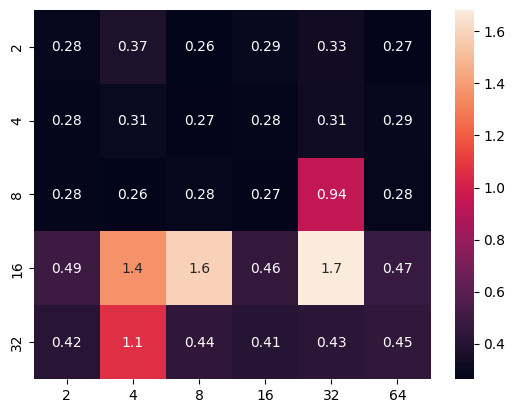

In [28]:
sns.heatmap(df, annot=True);

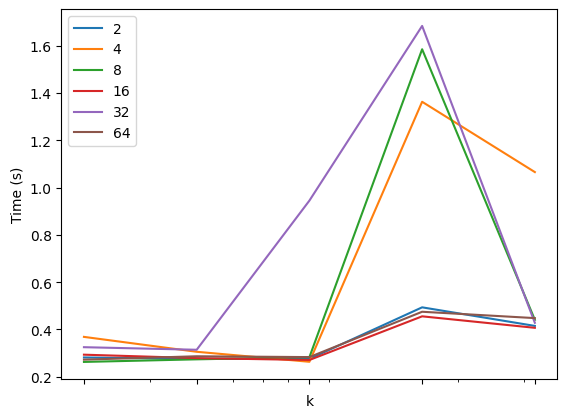

In [29]:
df.plot(logx=True, xticks=[2,4,8,16,32], xlabel="k", ylabel="Time (s)");